In [6]:
# import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as ss

In [46]:
def cleanse(df):
    """
        This function takes a DataFrame, 
        cleans or prepares it and returns it 
        for further analysis
    """
    
    # Removing duplicate data
    df = df.drop_duplicates()
    
    # Dropping empty columns
    for col in df.columns:
        if df[col].isna().all():
            df.dropna()
            
    return df

In [47]:
def plot_temp_sales_scatter(df):
    """
        This function takes a DataFrame 
        and creates a scatter plot
        relating temperature to sales.
    """

    # Setting the figure size and resolution
    plt.figure(figsize = (14, 6), dpi = 144)

    # Setting the scatter plot variables
    x = df.Temperature
    y = df.Weekly_Sales

    # The scatter plot
    # Color code contains opacity to show volume and avoid overcrowding 
    plt.scatter(x, y, c = "#3f3f3f58", s = 10)

    # Setting the title size
    plt.title("EFFECT OF TEMPERATURE ON WEEKLY SALES", 
              fontdict = {
                            "size": 20
                         })

    # Setting the axis label
    plt.xlabel("Temperature in Farenheit", fontdict = {"size": 14})  
    plt.ylabel("Weekly Sales", fontdict = {"size": 14})

    # Setting full digits display on the axis
    plt.ticklabel_format(style = "plain")

    plt.savefig("plots/temperature_scatter.jpg")

    plt.show()

In [48]:
def plot_unemployment_sales_scatter(df):
    """
        This function takes a DataFrame 
        and creates a scatter plot
        relating the unemployment rate to sales.
    """

    # Setting the figure size and resolution
    plt.figure(figsize = (14, 6), dpi = 144)

    # Setting the scatter plot variables
    x = df.Unemployment
    y = df.Weekly_Sales

    # The scatter plot
    # Color code contains opacity to show volume 
    # and avoid meaingless overcrowding 
    plt.scatter(x, y, c = "#3f3f3f50", s = 10, marker = "*")

    # Setting the title size
    plt.title("EFFECT OF UNEMPLOYMENT RATE ON WEEKLY SALES", 
              fontdict = {
                            "size": 20
                         })

    # Setting the axis label
    plt.xlabel("Unemployment Rate", fontdict = {"size": 14})
    plt.ylabel("Weekly Sales", fontdict = {"size": 14})

    # Setting full digits display on the axis
    plt.ticklabel_format(style = "plain")

    plt.savefig("plots/unemployment_scatter.jpg")

    plt.show()

In [49]:
def plot_temp_hist(df):
    """
        This function plots a Temperature histogram
    """

    # Setting the figure size and resolution
    plt.figure(figsize = (5, 2), dpi = 300)

    # Setting the histogram plot variables
    x = df.Temperature

    # The histogram plot
    plt.hist(x, bins = 30, color = "#3d3d3d")

    # Setting the axis label
    plt.xlabel("Temperature (deg F)")
    plt.ylabel("Frequency")

    # Setting title
    plt.title("TEMPERATURE HISTOGRAM")

    # Setting the tick size
    plt.xticks(size = 5)
    plt.yticks(size = 5)

    plt.savefig("plots/temperature_histogram.jpg")    

    plt.show()

In [50]:
def plot_fuel_hist(df):
    """
        This function plots a Fuel Price histogram
    """

    # Setting the figure size and resolution
    plt.figure(figsize = (5, 2), dpi = 300)

    # Setting the histogram plot variables
    x = df.Fuel_Price

    # The histogram plot
    plt.hist(x, bins = 30, color = "#3d3d3d")

    # Setting the axis label
    plt.xlabel("Fuel Prices ($)")
    plt.ylabel("Frequency")

    # Setting title
    plt.title("FUEL PRICE HISTOGRAM")

    # Setting the tick size
    plt.xticks(size = 5)
    plt.yticks(size = 5)

    plt.savefig("plots/fuel_histogram.jpg")    

    plt.show()

In [51]:
def plot_sales_hist(df):
    """
        This function plots the weekly sales histogram
    """

    # Setting the figure size and resolution
    plt.figure(figsize = (5, 2), dpi = 300)

    # Setting the histogram plot variables
    x = df.Weekly_Sales
    
    # The histogram plot
    plt.hist(x, bins = 45, color = "#3d3d3d")

    # Setting the axis label
    plt.xlabel("Weekly Sales ($)")
    plt.ylabel("Frequency")

    # Setting full digits display on the axis
    plt.ticklabel_format(style = "plain")

    # Setting title
    plt.title("WEEKLY SALES HISTOGRAM")

    # Setting the tick size
    plt.xticks(size = 5)
    plt.yticks(size = 5)

    plt.savefig("plots/sales_histogram.jpg")    

    plt.show()

In [52]:
def plot_cpi_boxplot(df):
    """
        This function plots a box plot 
        of the Consumer Price Index 
    """
    # Setting the figure size and resolution
    plt.figure(figsize = (5, 2), dpi = 144)

    # The Box plot
    sns.boxplot(data = df.CPI, x = df.CPI, color = "#cdcdcd")
    
    # Setting title
    plt.title("Distribution of Consumer Price Index")
    
    # Setting the axis label
    plt.xlabel("CPI")
    plt.ylabel("Frequency")
    
    plt.savefig("plots/cpi_boxplot.jpg")    

    plt.show()

In [53]:
# Creating the dataframe variable
sales = pd.read_csv("csv/walmart_sales.csv", index_col = 0)

# Checking the shape of the dataframe before cleaning
print(sales.shape)

# Data cleaning using the cleanse function 
sales = cleanse(sales)

sales = sales.reset_index()

# Checking the shape of the dataframe after cleaning
print(sales.shape)

# Confirming numeric dtypes 
print(sales.dtypes)

sales.describe()

(6435, 7)
(6435, 8)
Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object


,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


In [54]:
# # # Uncomment to convert date and Temperature Dtypes 
# # # as they were initially strings but they've been 
# # # permanently converted on my local machine

# # Changing the date column from string to a date dtype
# sales.Date = sales.Date.astype('datetime64[D]')

# # Changing the Temperature column from string to a float dtype
# sales["Temperature"] = sales["Temperature"].astype(float)


In [55]:
sales.dtypes

Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object

In [56]:
sales.corr(method = "pearson", numeric_only = True)

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
Store,1.000000e+00,-0.335332,-4.386841e-16,-0.022659,0.060023,-0.209492,0.223531
Weekly_Sales,-3.353320e-01,1.000000,3.689097e-02,-0.063810,0.009464,-0.072634,-0.106176
Holiday_Flag,-4.386841e-16,0.036891,1.000000e+00,-0.155091,-0.078347,-0.002162,0.010960
Temperature,-2.265908e-02,-0.063810,-1.550913e-01,1.000000,0.144982,0.176888,0.101158
Fuel_Price,6.002295e-02,0.009464,-7.834652e-02,0.144982,1.000000,-0.170642,-0.034684
CPI,-2.094919e-01,-0.072634,-2.162091e-03,0.176888,-0.170642,1.000000,-0.302020
Unemployment,2.235313e-01,-0.106176,1.096028e-02,0.101158,-0.034684,-0.302020,1.000000


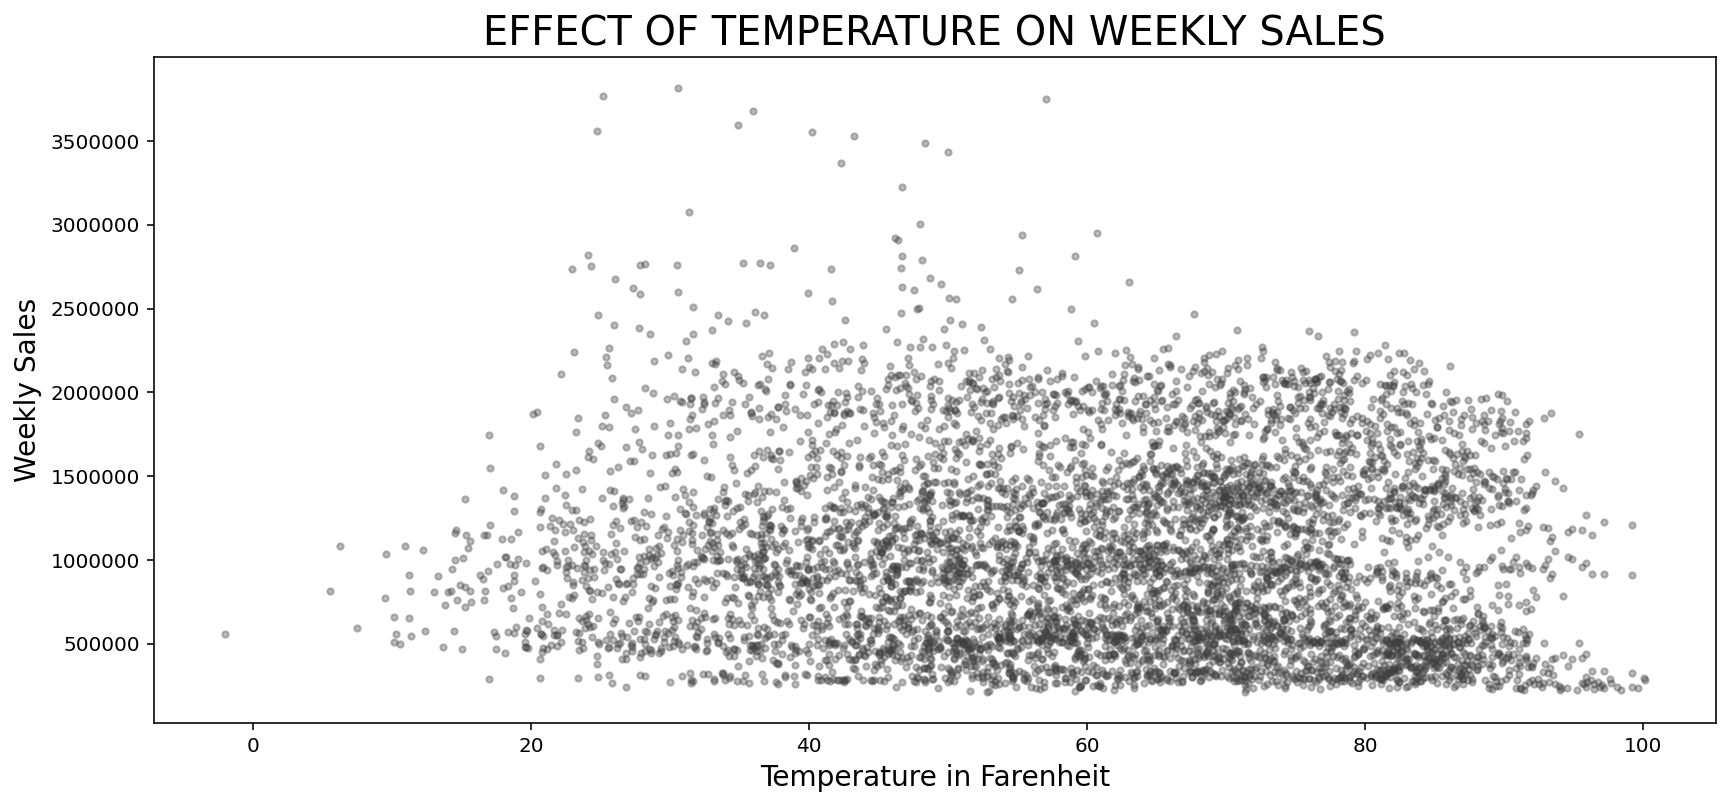

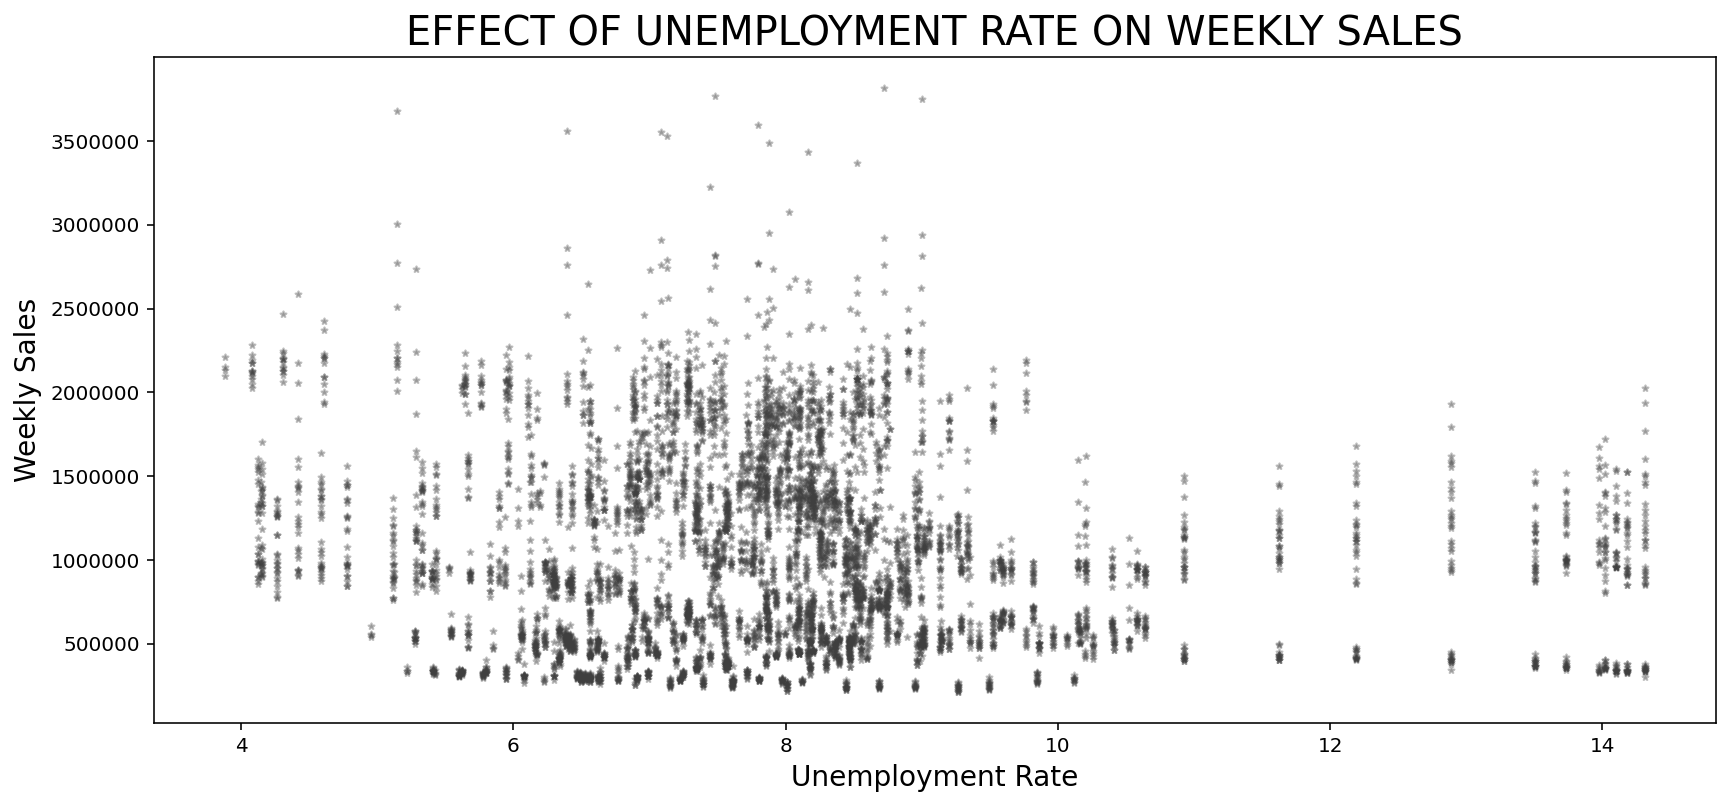

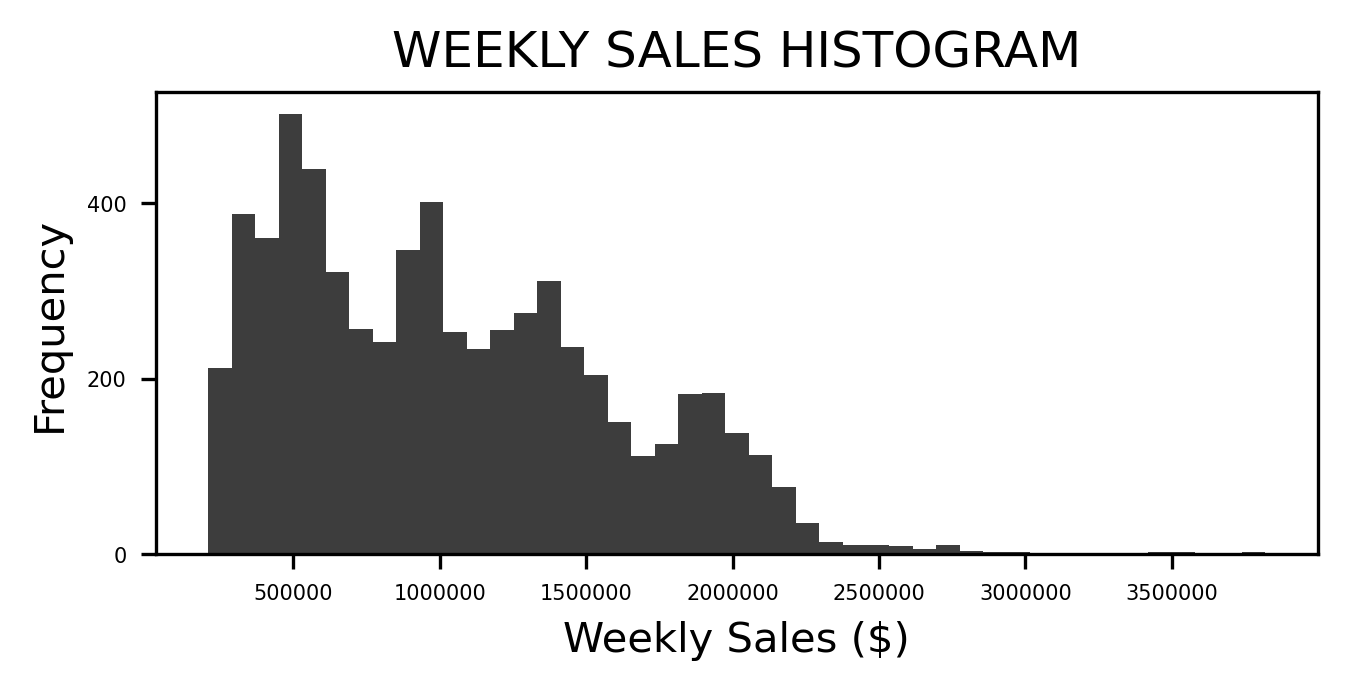

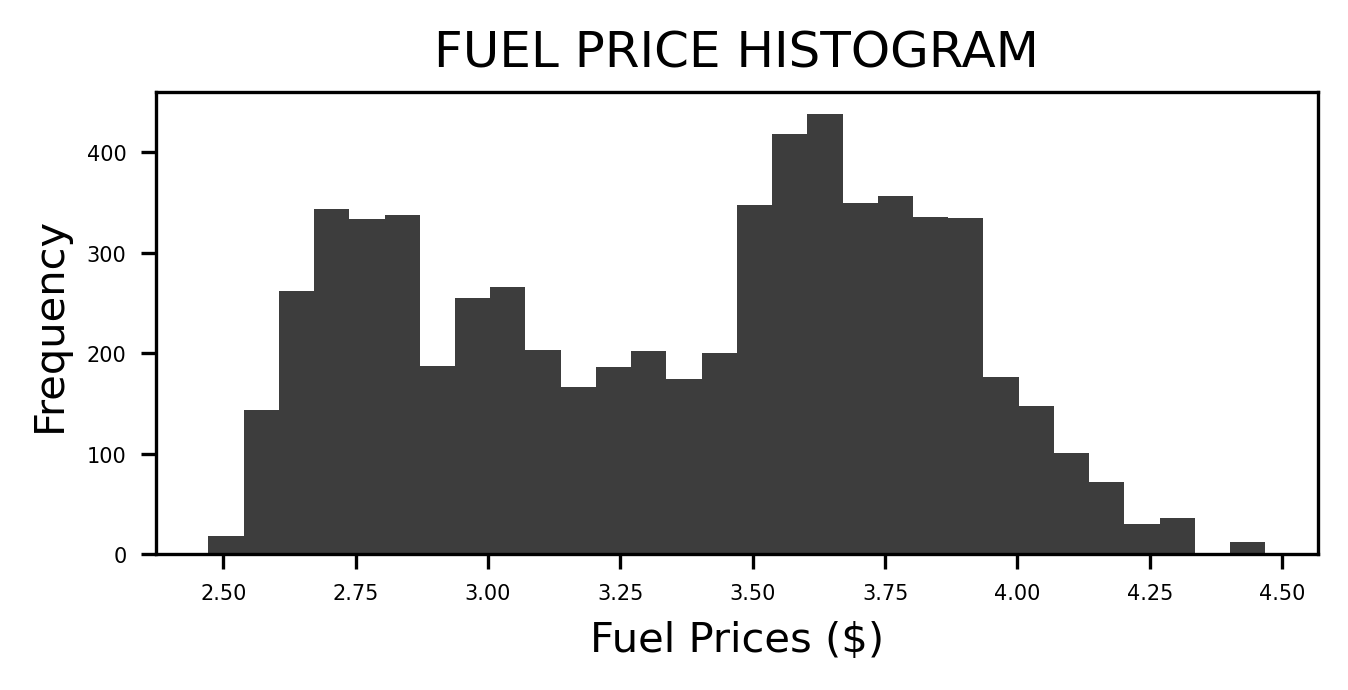

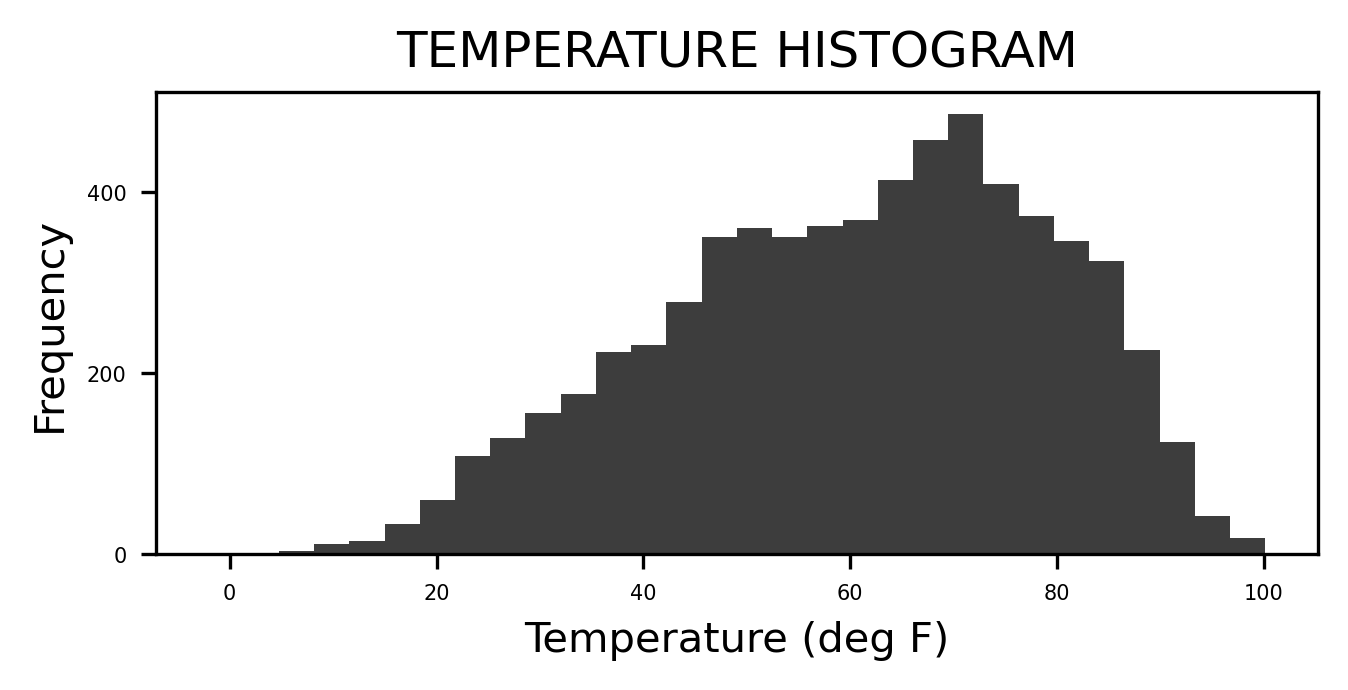

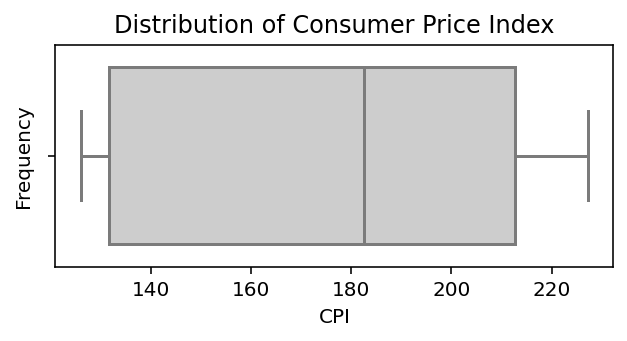

In [57]:
# Plotting all graphs
plot_temp_sales_scatter(sales)
plot_unemployment_sales_scatter(sales)
plot_sales_hist(sales)
plot_fuel_hist(sales)
plot_temp_hist(sales)
plot_cpi_boxplot(sales)